<a href="https://colab.research.google.com/github/BrajanNieto/stats-prob-py/blob/main/01.%20Ex-Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Concepts - Exercises in Python**

---

This script includes exercises and practical implementations of key probability concepts using Python. It is designed to help reinforce theoretical knowledge through hands-on coding examples.

**Topics Covered:**  

* **Fundamental Probability Rules**: Addition and Multiplication rules, Conditional probability, and Bayes' theorem.  
* **Discrete and Continuous Distributions**: Binomial, Poisson, Normal, and others.  
* **Random Variables and Simulations**: Monte Carlo methods and more.  

**Author:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

---

In [ ]:
#lib
import numpy as np

## Ex 1:
Three people enter an elevator on the first floor of a building with 10 floors. Each person is equally likely to choose any floor from 2 to 10 (independently). What is the probability that all three people want to go to consecutive floors?


In [ ]:
np.random.randint(2,11,3)

array([7, 7, 6])

In [ ]:
np.random.seed(100)
n_simulaciones = 10_000_000


resultados = np.random.randint(2, 11, (n_simulaciones, 3))
ordenados = np.sort(resultados, axis=1)
es_consecutivo = (ordenados[:, 1] - ordenados[:, 0] == 1) & (ordenados[:, 2] - ordenados[:, 1] == 1)
probabilidad = np.sum(es_consecutivo) / n_simulaciones

# Resultado
print(f"La probabilidad de que las 3 personas elijan pisos consecutivos es: {probabilidad:.6f}")


La probabilidad de que las 3 personas elijan pisos consecutivos es: 0.057647



#### Solution  

#### 1. Sample Space:  
Each person has 9 possible choices (floors 2 to 10).  
For three people, the total number of combinations is:  
$9^3 = 729$

#### 2. Favorable Outcomes:  
To have consecutive floors, the chosen floors can be represented as \([x, x+1, x+2]\), where \(x\) is the smallest floor:  
- $x$ can take values from $2$ to $8$ (as $x+2 \leq 10$).
- For each \(x\), the three people can arrive at the floors in any order. There are \(3! = 6\) permutations for each set of consecutive floors.

Thus, the total number of favorable outcomes is:  
7 * 6 = 42

#### 3. Probability:  
The probability is the ratio of favorable outcomes to the total sample space:  
$P = \frac{\text{Favorable Outcomes}}{\text{Sample Space}} = \frac{42}{729} = \frac{14}{243} \approx 0.0576$

## Ex 2:

In [ ]:
import random

# Definir la urna con las bolas: 'R' representa roja, 'A' representa azul
urna = ['R', 'R', 'R', 'A']

# Número de simulaciones
n_simulaciones = 100000

# Contadores
total_veces_primera_roja = 0
total_veces_segunda_roja = 0

for _ in range(n_simulaciones):
    # Extraer dos bolas sin reemplazo
    seleccionadas = random.sample(urna, 2)

    # Contar casos
    if seleccionadas[0] == 'R':
        total_veces_primera_roja += 1
        if seleccionadas[1] == 'R':
            total_veces_segunda_roja += 1

# Calcular probabilidades
prob_primera_roja = total_veces_primera_roja / n_simulaciones
prob_segunda_roja_dado_primera_roja = total_veces_segunda_roja / total_veces_primera_roja

# Mostrar resultados
print(f"Probabilidad de que la primera bola sea roja: {prob_primera_roja:.5f}")
print(f"Probabilidad de que la segunda bola sea roja dado que la primera fue roja: {prob_segunda_roja_dado_primera_roja:.5f}")


Probabilidad de que la primera bola sea roja: 0.74975
Probabilidad de que la segunda bola sea roja dado que la primera fue roja: 0.66438


# Variables aleatorias discretas

## **Distribución binomial**

 $X$ tiene distribución binomial con parámetros $n$ y $p$ si

 $$P(X=k)= \binom{n}{k} p^{k}(1-p)^{n-k}$$

 para $k=0, \dots, n$.

In [ ]:
from scipy.stats import binom

Los valores de la distribución son dados por el método pmf (*probability mass function*)


In [ ]:
n=5
p=0.1
k=3
binom.pmf(k, n, p)

0.0081

Gráfica de la distribución

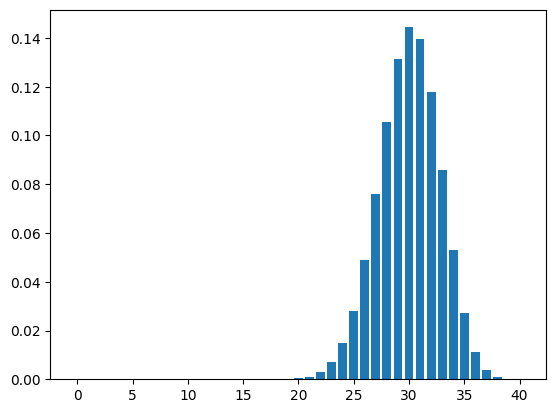

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

La distribución acumulada se calcula con el método cdf (cumulative density function)

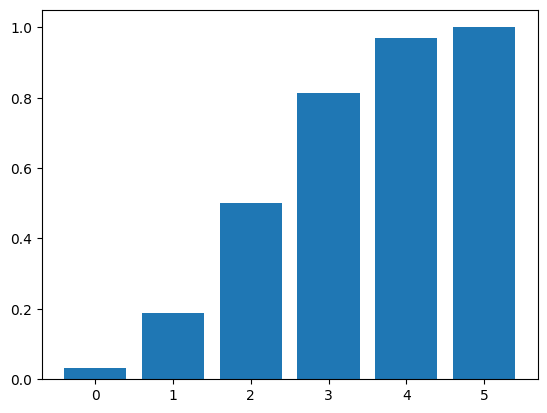

In [ ]:
n=5
p=0.5
plt.bar( np.arange(n+1),binom.cdf(np.arange(n+1), n, p))
plt.show()

Data simulada y su histograma. Notemos que es consistente con la distribución.

In [ ]:
n=5
p=0.5
binom.rvs(n,  p, size=100)

array([2, 2, 4, 1, 0, 1, 1, 4, 2, 4, 3, 1, 3, 3, 3, 3, 2, 4, 3, 2, 4, 2,
       2, 3, 1, 3, 1, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1,
       4, 4, 2, 2, 3, 3, 4, 2, 3, 2, 5, 0, 0, 0, 0, 3, 2, 4, 2, 4, 2, 2,
       1, 4, 0, 3, 2, 2, 2, 3, 4, 2, 2, 3, 5, 2, 2, 3, 1, 4, 3, 2, 2, 3,
       4, 2, 2, 4, 2, 2, 4, 4, 0, 3, 4, 1])

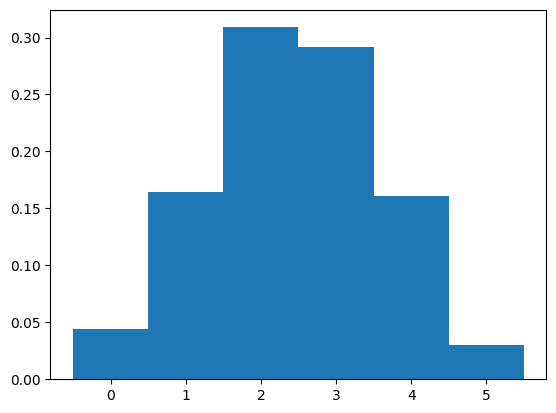

In [ ]:
n=5
p=0.5
plt.hist(binom.rvs(n, p, size=1000), bins=np.arange(-0.5, 6.5, 1), density=True), #false cuenta true brinda probabilidades
plt.show()

## **Ejercicio 1:**
Se muestra un aviso online a $40$ personas. La probabilidad de que alguien haga click en el aviso es de $0.75$. Halle la probabilidad de los siguientes eventos.

a) exactamente $20$ personas hagan click.

b) a lo más $20$ personas hacen click.

c) al menos $20$ personas hacen click.

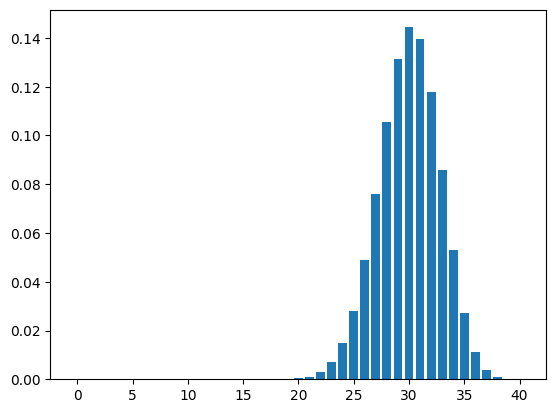

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
n=40
p=0.75
plt.bar( np.arange(n+1),binom.pmf(np.arange(n+1), n, p))
plt.show()

In [ ]:
n=40
p=0.75
binom.pmf(20, n, p)

0.00039757702137157343

In [ ]:
binom.cdf(20, n, p)

0.0005724311071761386

In [ ]:
1-binom.cdf(19, n, p)

0.9998251459141955

In [ ]:
n = 1000
p = 0.24
k = 200

1- binom.cdf(k-1,n,p)

0.9988753619900307

## **Distribución Geométrica**

   $X$ tiene distribución binomial con parámetro $p$ si

 $$P(X=k)= (1-p)^{k-1}p$$

 para $k=1,2, \dots$.

In [ ]:
from scipy.stats import geom

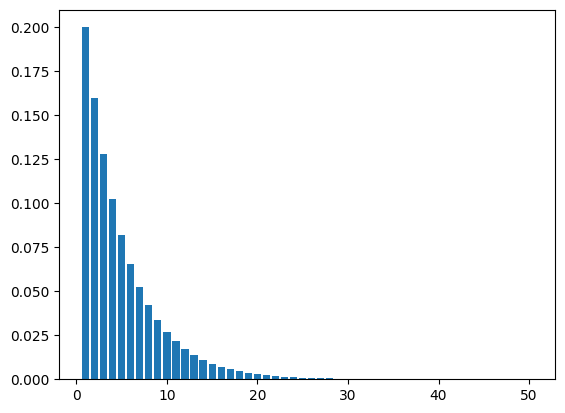

In [ ]:
p=0.2
n=50 #solo para graficar
plt.bar(np.arange(1,n+1),geom.pmf(np.arange(1, n+1), p))
plt.show()

La distribución acumulada

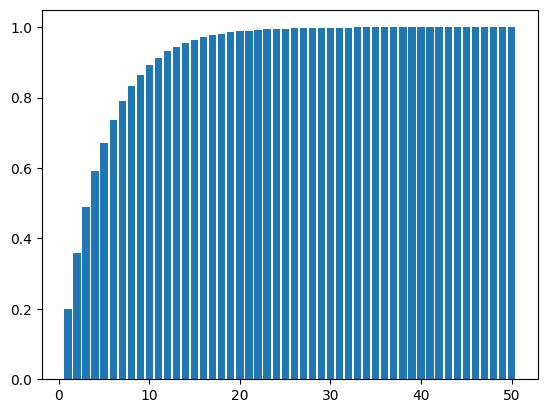

In [ ]:
plt.bar(np.arange(1,n+1),geom.cdf(np.arange(1, n+1), p))
plt.show()

Probabilidad de obtener un éxito a lo más en 11 intentos. Si $p=0.2$

In [ ]:
geom.cdf(11, p=0.2)

0.91410065408

## **Distribución Poisson**

$X$ tiene distribución Poisson con parámetro $\lambda$ si
$$P(X=k)= \dfrac{\lambda^k}{k!}e^{-\lambda}$$
para $k=0, 1, 2, \dots $

In [ ]:
from scipy.stats import poisson

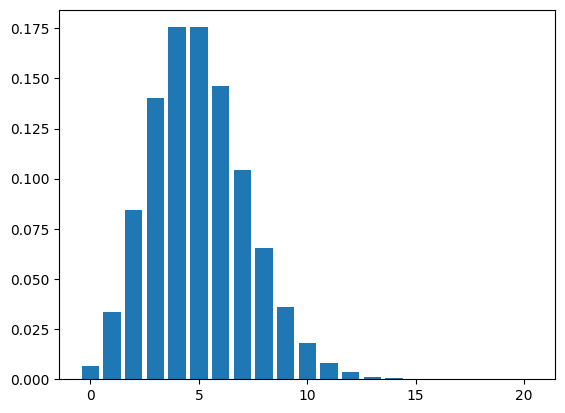

In [ ]:
lam=5 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

In [ ]:
poisson.pmf(4, mu=5)

0.17546736976785063

## **Ejercicio 2:**
Importa el objeto correspondiente a la distribución Poisson y grafica su distribución para $\lambda=2$.

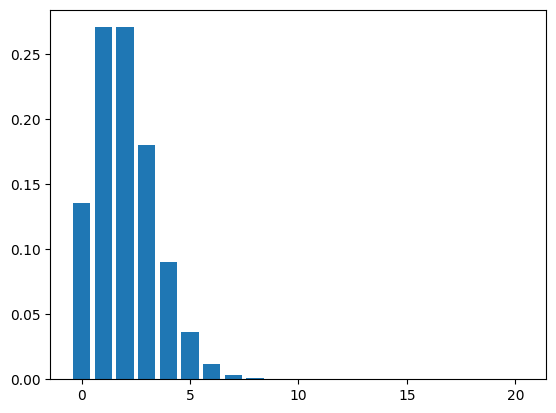

In [ ]:
lam=2 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

## **Ejercicio 3:**
Cierto restaurante recibe $10$ pedidos por hora en promedio.

a) Calcule la probabilidad de recibir algún pedido en $20$ minutos.

b) ¿Cuál es la máxima cantidad de tiempo que puede transcurrir para poder decir que la probabilidad de no recibir pedidos es por lo menos $0.5$?

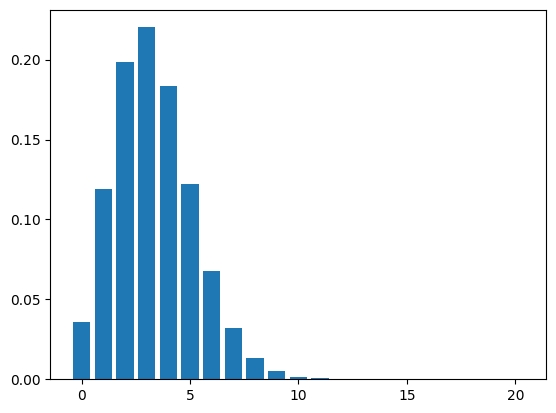

In [ ]:
lam=10/3 # promedio por unidad de tiempo
n=20
plt.bar(np.arange(0,n+1),poisson.pmf(np.arange(0, n+1), mu=lam))
plt.show()

In [ ]:
1-poisson.pmf(0, mu=lam)

0.9643260066527476

## **Ejercicio 4:**
Un sistema recibe ataques para vulnerarlo de manera aleatoria con un promedio de $100$ ataques por minuto. Halle la probabilidad de que el sistema reciba más de $20$ ataques en un lapso de $10$ segundos.

In [ ]:
1-poisson.cdf(20, 100/6)

0.17215995466217549

## Valor esperado

In [ ]:
n=10
p = 0.2
valor1 = 0
for x in range(0,6):
  b_value = binom.pmf(x, n, p)
  total = 10*b_value
  print(f"suma 10P(X=x) de x=0 a ", x,"  = ",total)
  valor1+=total
print(valor1)


suma 10P(X=x) de x=0 a  0   =  1.0737418240000003
suma 10P(X=x) de x=0 a  1   =  2.6843545599999996
suma 10P(X=x) de x=0 a  2   =  3.0198988800000004
suma 10P(X=x) de x=0 a  3   =  2.0132659199999994
suma 10P(X=x) de x=0 a  4   =  0.880803839999999
suma 10P(X=x) de x=0 a  5   =  0.2642411519999998
9.936306175999999


In [ ]:
n=10
p = 0.2
valor2 = 0
for x in range(6,11):
  b_value = binom.pmf(x, n, p)
  total = 2*x*b_value
  #print(f"P(X>={x}) = {total}")
  valor2+=total
print(valor2)

valor2+valor1

0.07832576000000006


10.014631935999999

## **Ejercicio 5:**

En un juego de apuestas, la probabilidad de ganar S/.10 es 0.4 y la probabilidad de perderlos es 0.6. Halle la ganancia esperada.

Simula este juego 1000 veces y observa la ganancia obtenida.

## **Ejercicio 6:**
La probabilidad de encontrar un artículo defectuoso en una fábrica es $p=0.23$. Asumimos que dichos artículos ocurren independientemente. Deseamos encontrar la cantidad promedio de artículos que debemos inspeccionar hasta encontrar uno defectuoso.

Simula este proceso 1000 veces. Luego observa el promedio de la cantidad de artículos que se tuvo que inspeccionar antes de encontrar el defectuoso.

# Varianza

## **Ejercicio 7:**
Dos posibles inversiones tienen retornos aleatorios $R_1$ y $R_2$. Uno de ellos tiene un riesgo y el otro es una inversión segura.

* $R_1$ tiene valor esperado $\mu_1=0.1$ y desviación estándar $\sigma_1=0.075$.  
* $R_2$ tiene valor esperado $\mu_2=0.03$ y desviación estándar $\sigma_2=0$.  

Si se tiene un capital de $C=1$ para invertir e invierte en proporciones $\pi_1$ y $1-\pi_1$ para $R_1$ y $R_2$, respectivamente. Halle el valor esperado y la varianza de su retorno total.

Simule 1000 escenarios con $C=1$, $\pi_1=0.3$ e indique la distribución del retorno. Asuma que la distribución de $R_1$ es normal.

Esperanza 0.051
Varianza 0.00050625


Text(0, 0.5, 'Densidad')

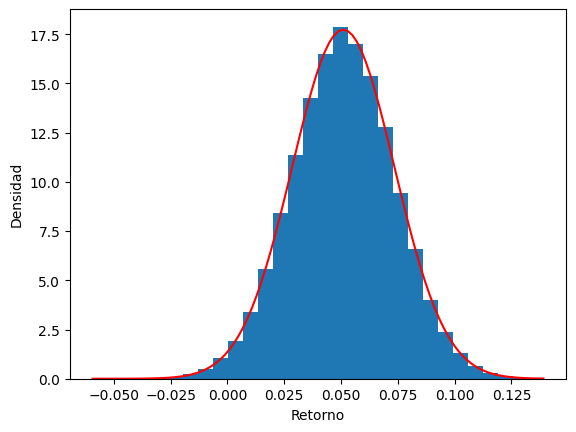

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
C = 1
pi1 = 0.3
# Datos para la primera proporción
mu1 = 0.1
sigma1 = 0.075
# Datos para la segunda proporción
mu2 = 0.03
sigma2 = 0.0
esperanza_retorno = pi1 * mu1 + (1 - pi1) * mu2
print("Esperanza", esperanza_retorno)
varianza = (pi1**2) * (sigma1**2) + ((1 - pi1)**2) * (sigma2**2)
print("Varianza",varianza)
# Simulación
R1 = np.random.normal(mu1, sigma1, 100000)
R2 = np.random.normal(mu2, sigma2, 100000)
R = pi1 * R1 + (1 - pi1) * R2
# Graficar la distribución del retorno
plt.hist(R, bins=30, density=True)
x = np.linspace(min(R), max(R), 100)
plt.plot(x, 1 / (np.sqrt(2 * np.pi * varianza)) * np.exp(-(x - esperanza_retorno)**2 / (2 * varianza)), 'r-', label='Distribución normal')
plt.xlabel('Retorno')
plt.ylabel('Densidad')

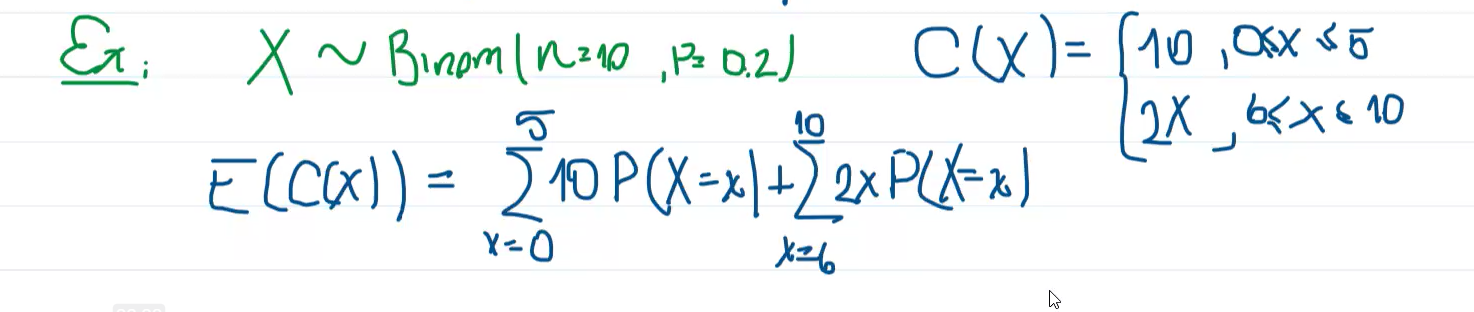

In [ ]:
from scipy.stats import binom


In [ ]:
#Calculo binomial
n = 10
p = 0.2
sum1 = 0
sum2 = 0
for i in range(0, 6):
  sum1 += (10* binom.pmf(i, n, p))

for i in range(6,11):
  sum2 += (2*i*binom.pmf(i, n, p))

print(sum1+sum2)


10.014631935999999


# Variables aleatorias continuas


# **Distribución normal**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

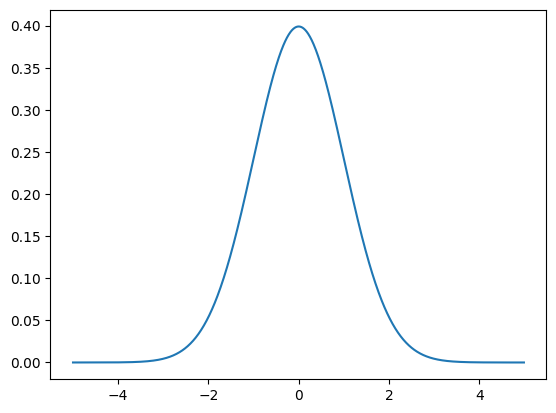

In [ ]:
from scipy.stats import norm
mu=0
sigma=1
x=np.arange(-5, 5, 0.01)
y=norm.pdf(x, mu, sigma) # valor de la función densidad
plt.plot(x, y)
plt.show()

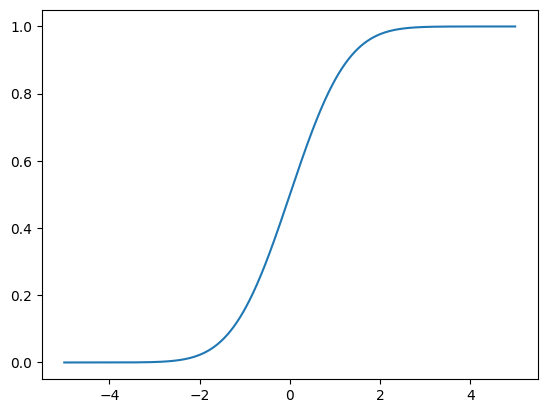

In [ ]:
x=np.arange(-5, 5, 0.01)
y=norm.cdf(x, 0, 1) # Función de densidad acumulada
plt.plot(x, y)
plt.show()

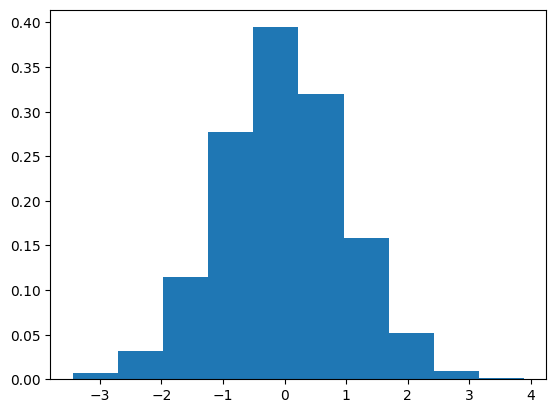

In [ ]:
mu=0
sigma=1
plt.hist(norm.rvs(mu, sigma, size=1000), density=True) # muestra aleatoria
plt.show()

## **Ejercicio 1:**
Si $Z$ sigue la distribución normal estándar halle

a) P(Z<1)

b) P(Z>1)


In [ ]:
print(norm.cdf(1))
print(1-norm.cdf(1))

0.8413447460685429
0.15865525393145707


## **Ejercicio 2:**

Asuma que los pesos de cierta población de personas se distribuyen de manera normal con media 75 kg y desviación estándar de 9.4 kg. Halle la probabilidad de que una persona pese más de 87 kg.

In [ ]:
# prob
u = 75
s = 9.4
p87 = norm.cdf(87, u, s)
print(1-p87)

0.10087250248903379


# Cuantiles

In [ ]:
# cuantil 0.1 ( cual es el valor de modo que la porb antes delk valor es 0.1 )
norm.ppf(0.1, 0, 1)

-1.2815515655446004

In [ ]:
norm.cdf(-1.2815515655446004, 0, 1)

0.10000000000000009

In [ ]:
mu=75
sigma=9.4
norm.ppf(0.01, mu, sigma)

53.132329984016096

## **Valores críticos**

Definimos a $z_{\alpha}$ como aquel numero tal que la probabilidad de que la variable $Z$ esté a la derecha de ese número es $\alpha$. A este número se le llama el valor crítico correspondiente a $\alpha$.

Por ejemplo, calculemos $z_{0.05}$, $z_{0.025}$ y $z_{0.001}$

In [ ]:
alpha=0.05
norm.ppf(1-alpha, 0, 1)

1.6448536269514722

In [ ]:
norm.cdf(1.6448536269514722)

0.95

In [ ]:
alpha=0.025
norm.ppf(1-alpha) # Por defecto se asume que la media es 0 y la desviación estándar es 1

1.959963984540054

In [ ]:
alpha=0.001
norm.ppf(1-alpha) # Por defecto se asume que la media es 0 y la desviación estándar es 1

3.090232306167813

# **Distribución exponencial**

## **Ejercicio 3:**
Sea $X\sim Exp(2)$. Calcule

$$P(0<X<1)$$

(La función *expon* de *scipy.stats* toma parámetro scale=$\frac{1}{\lambda}$.)

In [ ]:
from scipy.stats import expon
lambda_param = 2
scale_param = 1 / lambda_param
p = expon.cdf(1, scale=scale_param) - expon.cdf(0, scale=scale_param)
p

0.8646647167633873

In [ ]:
1/12.5

0.08

## **Ejercicio 4:**
El tiempo de vida de un componente electrónico sigue una distribución exponencial con $\lambda=0.1$.

a) Halle la probabilidad de que el tiempo de vida sea menor que $10$.

b) Halle la probabilidad de que el tiempo de vida este entre $5$ y $10$

c) Halle el valor de $t$ tal que la probabilidad de que el tiempo de vida sea mayor que $t$ es $0.01$.

In [ ]:
from scipy.stats import expon
lambda_param = 0.1
scale_param = 1 / lambda_param
expon.cdf(10, scale=scale_param)

In [ ]:
expon.cdf(10, scale=scale_param)-expon.cdf(5, scale=scale_param)

In [ ]:
alfa = 0.01
critico = 1 - alfa
expon.ppf(critico, scale=scale_param)

2.3025850929940455


# **Distribución gamma**  

## **Ejercicio 5:**
Grafica la distribución Gamma con parámetros

shape $\alpha=5$

scale $\lambda=2$

(La función *gamma* de *scipy.stats* toma parámetros $a=\alpha$ y scale=$\frac{1}{\lambda}$)

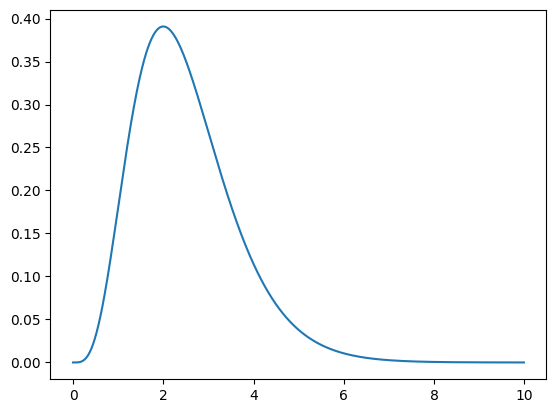

In [ ]:
from scipy.stats import gamma
x=np.arange(0, 10, 0.01)
y=gamma.pdf(x, a=5, scale=1/2)
plt.plot(x,y)
plt.show()

# Función lineal de una variable normal

Si $X\sim N(\mu, \sigma^2)$, entonces
$$Y=a+bX$$
se distribuye de manera normal con media $\mu_Y=a+b\mu$ y varianza $\sigma^2_Y=b^2\sigma^2$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

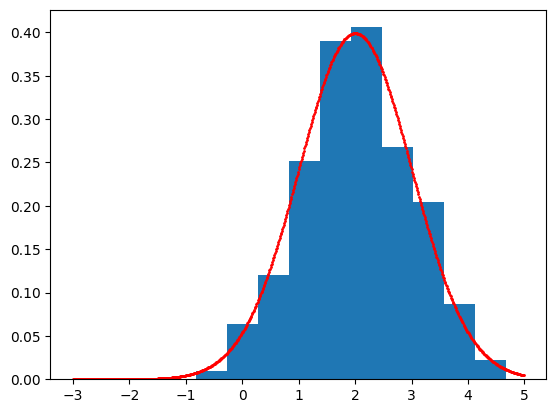

In [ ]:
mu=2
sigma=1
muestra_X=norm.rvs(mu, sigma, size=1000)
plt.hist(muestra_X, density=True)

x=np.arange(-3, 5, 0.01)
y=norm.pdf(x, mu, sigma)
plt.plot(x, y, "ro", ms=1)
plt.show()

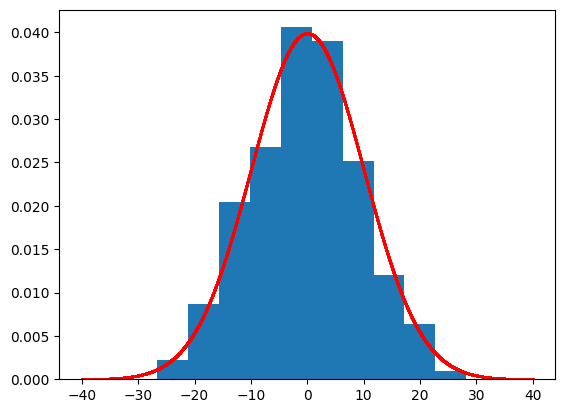

In [ ]:
muestra_Y=-10*muestra_X+20

plt.hist(muestra_Y, density=True)

x=np.arange(-40, 40, 0.01)
y=norm.pdf(x, -10*mu+20, 10*sigma)
plt.plot(x, y, "ro", ms=1)
plt.show()

## Caso general

## **Ejercicio 6:**

a) Simule una muestra de la variable $X=Z^2$, donde $Z\sim N(0, 1)$. Grafique un histograma de dicha muestra donde las alturas de las barras correspondan a la densidad.

b) Halle la función de densidad de $X$ y compárela con el histograma de la parte a)


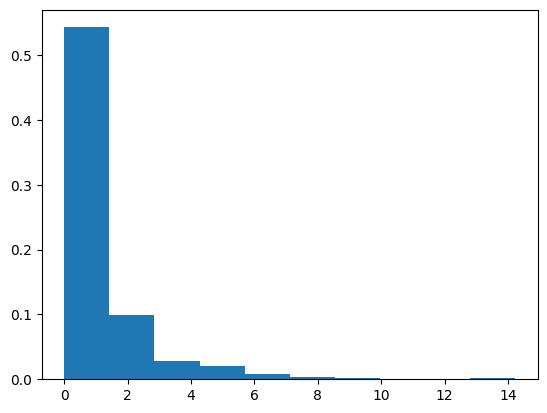

In [ ]:
Z=norm.rvs(size=1000)
X=Z**2
plt.hist(X, density=True)
plt.show()

In [ ]:
np.mean(X)

1.0080465016374893

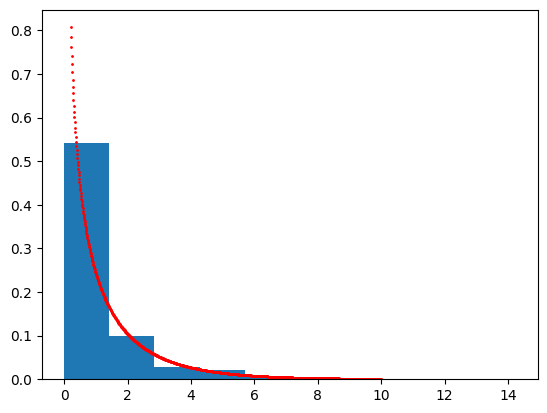

In [ ]:
from scipy.stats import chi2
plt.hist(X, density=True)

x=np.arange(0.2, 10, 0.01)
y=chi2.pdf(x, df=1)
plt.plot(x, y, "ro", ms=1)
plt.show()

## **Ejercicio 7:**
Sea $X\sim N(0, \sigma^2)$ con $\sigma=3$. Sea $Y=|X|$.

a) Genere una muestra de tamaño $1000$ para la variable $Y$.

b) ¿La variable $Y$ tiene una distribución normal?

c) Halle la función de densidad de $Y$. Grafíquela sobre el histograma de la muestra para verificar que es correcta.


## **Ejercicio 8:**
Realice el mismo proceso del Ejercicio 1 con la variable $Y=e^Z$, donde $Z\sim N(\mu, \sigma^2)$ con $\mu=-2$ y $\sigma=1$.


## **Ejercicio 9:**
Si $X$ tiene función de densidad
$$f(x)=\dfrac{1+2x}{2}, \quad 0\leq x \leq 1,$$
halle $E(X)$.

# **Generación de muestras pseudoaleatorias**

# Generación de una muestra pseudoaleatoria uniforme


Método de congruencia lineal (https://en.wikipedia.org/wiki/Linear_congruential_generator)


$$x_n=ax_{n-1}+b \mod m$$

Por ejemplo, podemos considerar $a=22695477$, $b=1$ y $m=2^{31}$ y con valor inicial $x_0$ dado por el tiempo de la maquina.

Los valores
$$\frac{x_n}{2^{31}}$$
son nuestra muestra pseudoaleatoria.



In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
seed=np.floor(time.time())
seed

1738269102.0

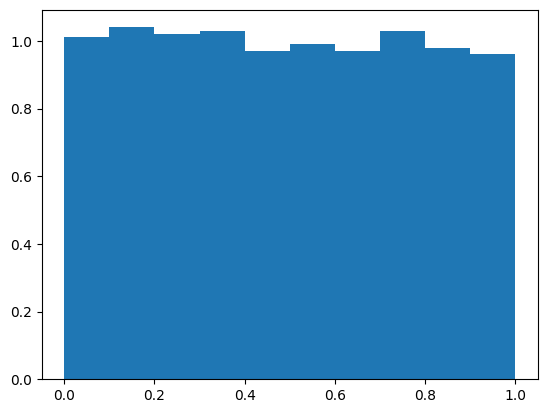

In [ ]:
a=22695477 # Valor predeterminado
b=1
m=2**31
x=seed
muestra_uniforme=[]
for i in range(1000):
  x=(a*x+b) % m
  out=x/m
  muestra_uniforme.append(out)

plt.hist(muestra_uniforme, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], density=True)
plt.show()

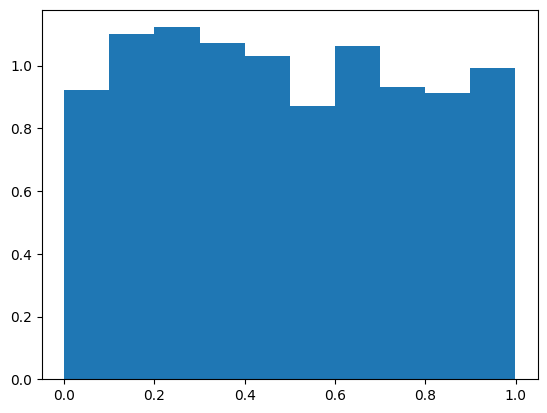

In [ ]:
from scipy.stats import uniform
plt.hist(uniform.rvs(size=1000), density=True)
plt.show()

# Método de la inversa de la función de distribución acumulada

Sea $U$ una variable aleatoria con distribución uniforme en $[0, 1]$ y sea $F$ una función de densidad acumulada, entonces
$$X=F^{-1}(U)$$
tiene densidad acumulada $F$.

## **Ejemplo:**

Generaremos una muestra aleatoria la variable $X$ con densidad

$$f(x)=2x, \quad  0\leq x\leq 1$$


In [ ]:
from scipy.stats import uniform
import numpy as np
muestra_uniforme=uniform.rvs(size=1000)

In [ ]:
muestra_X=np.sqrt(muestra_uniforme)

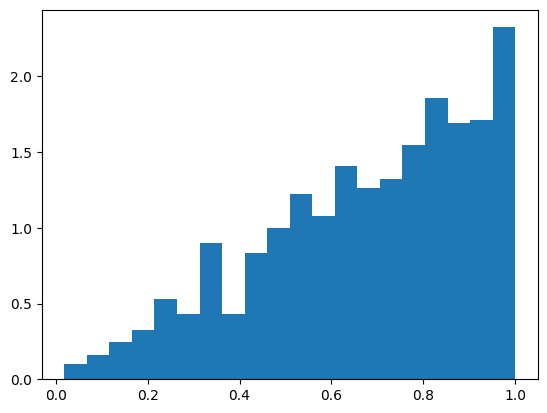

In [ ]:
plt.hist(muestra_X, density=True, bins=20)
plt.show()

# Método de Aceptación/Rechazo

In [ ]:
from scipy.stats import uniform, beta

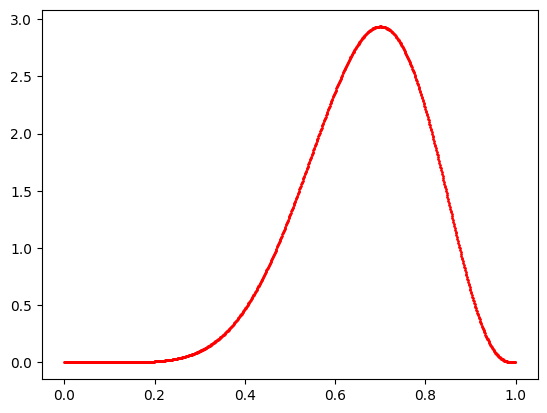

In [ ]:
x=np.arange(0, 1, 0.001)
y=[beta.pdf(k, a=8, b=4) for k in x]
plt.plot(x, y, "ro", ms=1)
plt.show()

In [ ]:
a=8
b=4
N=10000
C=3
muestra_uniforme=uniform.rvs(size=N)
muestra_beta=[]
for i in range(N):
  x=muestra_uniforme[i]
  num_aleatorio=uniform.rvs(size=1)[0]
  h=beta.pdf(x, a, b)
  if num_aleatorio<h/C:
    muestra_beta.append(x)

In [ ]:
len(muestra_beta)

3331

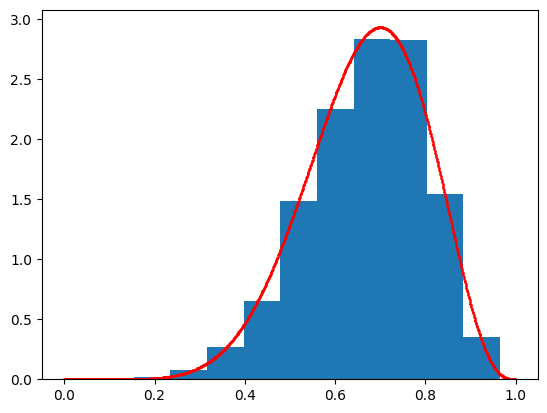

In [ ]:
plt.hist(muestra_beta, density=True)
x=np.arange(0, 1, 0.001)
y=[beta.pdf(k, a=8, b=4) for k in x]
plt.plot(x, y, "ro", ms=1)
plt.show()

In [ ]:
from scipy.stats import norm

In [ ]:
1-norm.pdf(2.5)

0.9824716995064314

## Probabilidad de Error en un Algoritmo de Clasificación de Guiones  

Un algoritmo de IA se utiliza para identificar si un guion de película es violento. Este es un algoritmo de clasificación que distingue entre dos clases y tiene una precisión del **93%**.  

Se desea utilizar este algoritmo en producción para clasificar **400 guiones**. Queremos determinar la probabilidad de que el número de errores en la clasificación sea **menor que 30**.  



In [ ]:
import math
suma = 0
for i in range(30):
  suma += math.comb(400, i) * (0.07**i) * (0.93**(400-i))
print(sum)


0.6253239595979516


In [ ]:
from scipy.stats import binom
n = 400
sum = 0
p = 0.07
k = 29
sum = binom.cdf(k, n, p)
print(sum)


0.6253239595979375


## Enunciado del Problema

Considere la data **`duracion_llamadas.csv`**, que contiene la duración de 50 llamadas a un call center en minutos.

Si asumimos que la distribución es **exponencial**, responda lo siguiente:

1. ¿Cuál sería su parámetro \( \lambda \)?
2. ¿Cuál es la probabilidad de que una llamada dure más de 20 minutos?


In [ ]:
import pandas as pd
df = pd.read_csv("duracion_llamadas.csv")
print(df)

    Unnamed: 0   duracion
0            0   9.944798
1            1   5.869210
2            2  28.470264
3            3  19.640632
4            4  19.044406
5            5   1.019866
6            6   8.086171
7            7   7.139552
8            8  12.718720
9            9   9.769648
10          10   0.786956
11          11   2.492485
12          12   0.519649
13          13  14.050756
14          14   0.470886
15          15   0.444136
16          16   7.730865
17          17   4.311077
18          18   1.024971
19          19  46.107169
20          20  10.956268
21          21  51.693966
22          22   9.037921
23          23   8.377128
24          24  11.610256
25          25   5.330838
26          26   5.384290
27          27   0.183721
28          28   1.987974
29          29   3.531338
30          30  18.882935
31          31  63.518425
32          32   6.503120
33          33   1.330283
34          34   5.038312
35          35  51.182266
36          36   2.188965
37          

In [ ]:
del sum

In [ ]:
mu = sum(df["duracion"]) / len(df["duracion"])
print(mu)

13.114925664099406


In [ ]:
# lambda es la inversa de la media:
mu = 13.114925664099406 # es el dato calculado de la data
lambda_exp = 1 / mu
print(lambda_exp)


0.07624900251912098


In [ ]:
#duracion de la llamada por mas de 20 min
from scipy.stats import expon
p = 1 - expon.cdf(20, scale=1/lambda_exp)
print(p)

0.2176253983654003


In [ ]:
import math
# la distribucion acumulada es 1 - exp(- lambda x)
p = 1 - math.exp(- lambda_exp * 20)
# inversa por mas de 20 min
print(1-p)

0.2176253983654003


In [ ]:
# probabilidad de que la llamada dure entrew 5 y 10 min
p = expon.cdf(10, scale=1/lambda_exp) - expon.cdf(5, scale=1/lambda_exp)
print(p)

0.9265854557191493


## Enunciado del Problema

Se supone que las calificaciones de un examen están **normalmente distribuidas** con:

- Media: \( \mu = 78 \)
- Varianza: \( \sigma^2 = 36 \)

Suponga que los estudiantes que alcancen el **10% más alto** de esta distribución reciben una calificación de **A**.

### **Pregunta**
¿Cuál es la **calificación mínima** que un estudiante debe recibir para obtener una **A**?


In [ ]:
# calculo de valor critico alpha = 0.1
from scipy.stats import norm
mu = 78
sigma = 6
alpha = 0.1
z_alpha = norm.ppf(1-alpha, mu, sigma)
print(z_alpha)

85.6893093932676


In [ ]:
from scipy.stats import norm

# Datos del problema
mu = 78      # Media
sigma = 6    # Desviación estándar (σ = √varianza)
alpha = 0.1  # Percentil 90% (porque queremos el 10% más alto)

# Calcular el cuantil z correspondiente
z_alpha = norm.ppf(1 - alpha)  # Aquí no se pasa mu ni sigma

# Transformar a la escala de la distribución dada
x_alpha = mu + z_alpha * sigma

print(f"Calificación mínima para A: {x_alpha:.2f}")


Calificación mínima para A: 85.69


In [ ]:
#compruebo

prob = norm.cdf(85.6893093932676, mu, sigma)
print(prob)

0.9000000000000001


##Teotema Cental de Limite Ley fyerte de grandes numeros

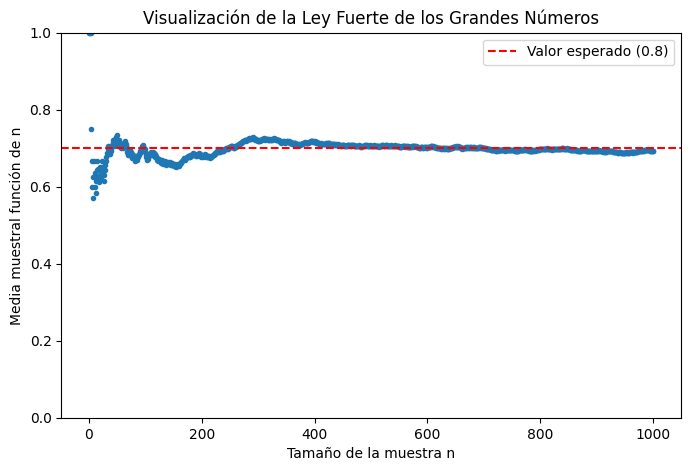

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
nsim = 1000  # Número de observaciones
p = 0.7  # Probabilidad de éxito en Bernoulli

# Generar nsim observaciones de una distribución Bernoulli
X = np.random.binomial(1, p, nsim)

# Calcular la media muestral acumulada
xbar = np.cumsum(X) / np.arange(1, nsim + 1)

# Graficar la convergencia de la media muestral
plt.figure(figsize=(8, 5))
plt.plot(range(1, nsim + 1), xbar, marker=".", linestyle="none")
plt.axhline(y=0.7, color='red', linestyle='--', label='Valor esperado (0.8)')
plt.ylim(0, 1)
plt.title("Visualización de la Ley Fuerte de los Grandes Números")
plt.xlabel("Tamaño de la muestra n")
plt.ylabel("Media muestral función de n")
plt.legend()
plt.show()


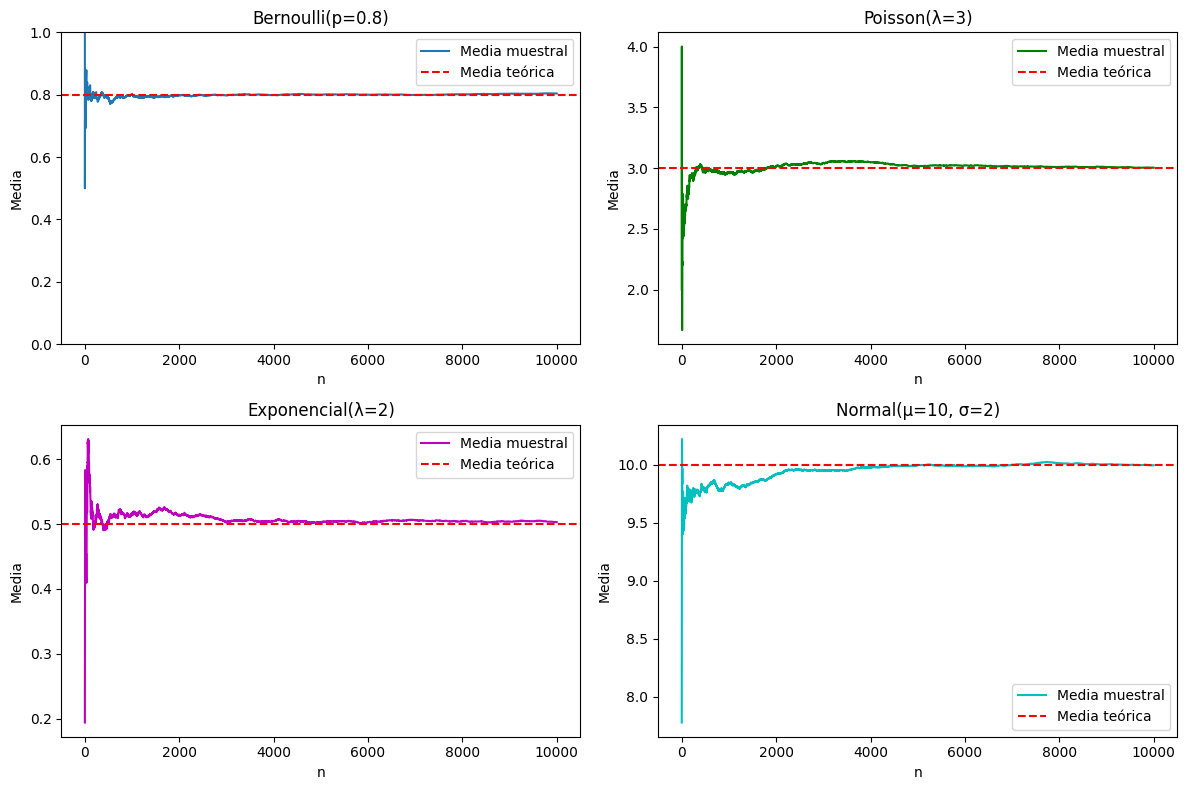

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos semilla para reproducibilidad (opcional)
np.random.seed(42)

# Número de simulaciones
nsim = 10_000

# Crear figura con subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

##########################
# 1. Distribución Bernoulli
##########################
p = 0.8
X_bern = np.random.binomial(n=1, p=p, size=nsim)
media_teorica_bern = p

# Media muestral acumulada
media_acumulada_bern = np.cumsum(X_bern) / np.arange(1, nsim + 1)

axes[0, 0].plot(media_acumulada_bern, label='Media muestral')
axes[0, 0].axhline(y=media_teorica_bern, color='r', linestyle='--', label='Media teórica')
axes[0, 0].set_title('Bernoulli(p=0.8)')
axes[0, 0].set_xlabel('n')
axes[0, 0].set_ylabel('Media')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend()

##########################
# 2. Distribución Poisson
##########################
lmbda = 3
X_pois = np.random.poisson(lam=lmbda, size=nsim)
media_teorica_pois = lmbda

# Media muestral acumulada
media_acumulada_pois = np.cumsum(X_pois) / np.arange(1, nsim + 1)

axes[0, 1].plot(media_acumulada_pois, label='Media muestral', color='g')
axes[0, 1].axhline(y=media_teorica_pois, color='r', linestyle='--', label='Media teórica')
axes[0, 1].set_title('Poisson(\u03BB=3)')
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('Media')
axes[0, 1].legend()

############################
# 3. Distribución Exponencial
############################
rate = 2  # Parámetro lambda (tasa)
X_exp = np.random.exponential(scale=1/rate, size=nsim)
media_teorica_exp = 1 / rate

# Media muestral acumulada
media_acumulada_exp = np.cumsum(X_exp) / np.arange(1, nsim + 1)

axes[1, 0].plot(media_acumulada_exp, label='Media muestral', color='m')
axes[1, 0].axhline(y=media_teorica_exp, color='r', linestyle='--', label='Media teórica')
axes[1, 0].set_title('Exponencial(\u03BB=2)')
axes[1, 0].set_xlabel('n')
axes[1, 0].set_ylabel('Media')
axes[1, 0].legend()

############################
# 4. Distribución Normal
############################
mu, sigma = 10, 2
X_norm = np.random.normal(loc=mu, scale=sigma, size=nsim)
media_teorica_norm = mu

# Media muestral acumulada
media_acumulada_norm = np.cumsum(X_norm) / np.arange(1, nsim + 1)

axes[1, 1].plot(media_acumulada_norm, label='Media muestral', color='c')
axes[1, 1].axhline(y=media_teorica_norm, color='r', linestyle='--', label='Media teórica')
axes[1, 1].set_title('Normal(\u03BC=10, \u03C3=2)')
axes[1, 1].set_xlabel('n')
axes[1, 1].set_ylabel('Media')
axes[1, 1].legend()

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

# Número de puntos
n = 10000000

# Generar puntos aleatorios en el cuadrado [-1,1] x [-1,1]
x = np.random.uniform(-1, 1, n)
y = np.random.uniform(-1, 1, n)

# Contar los puntos dentro del círculo de radio 1 (x^2 + y^2 <= 1)
inside_circle = np.sum(x**2 + y**2 <= 1)

# Estimación de π usando la relación de áreas
pi_estimate = (inside_circle / n) * 4

print(f"Estimación de π: {pi_estimate}")


Estimación de π: 3.141836


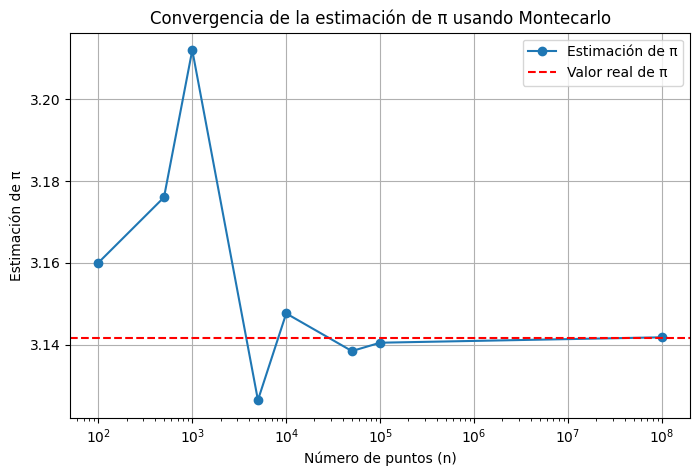

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Diferentes valores de n
n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 100000000]
pi_estimates = []

for n in n_values:
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    pi_estimate = (inside_circle / n) * 4
    pi_estimates.append(pi_estimate)

# Graficar la convergencia
plt.figure(figsize=(8, 5))
plt.plot(n_values, pi_estimates, marker='o', linestyle='-', label="Estimación de π")
plt.axhline(y=np.pi, color='r', linestyle='--', label="Valor real de π")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.xlabel("Número de puntos (n)")
plt.ylabel("Estimación de π")
plt.title("Convergencia de la estimación de π usando Montecarlo")
plt.legend()
plt.grid(True)
plt.show()
